In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

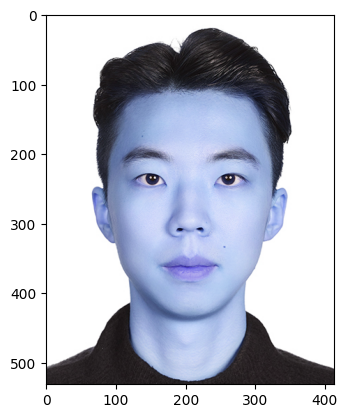

In [2]:
my_image_path = '/content/drive/MyDrive/Aiffel/여권사진.jpg' # 본인 이미지가 있는 경로를 가지고 옵니다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

- cv2는 BGR로 받기 때문에 이런 사진이 나온 것 <br>
- BGR2RGB를 해줘야합니다.

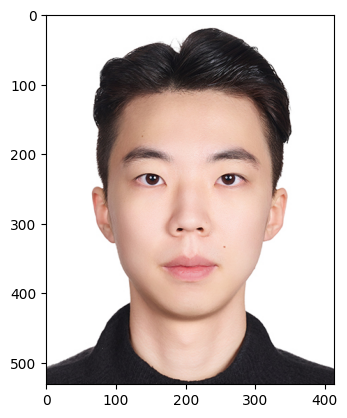

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(82, 171) (349, 439)]]


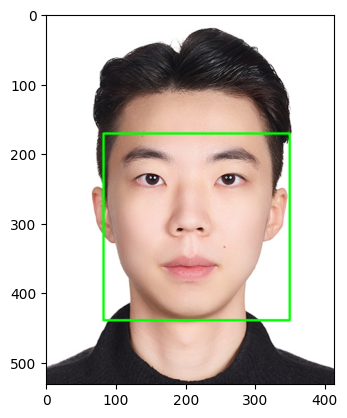

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- left : 82 <br>
- right : 349 <br>
- top : 171 <br>
- bottom : 439

In [7]:
# 필요한 라이브러리 설치
!apt-get install -y wget bzip2

# 모델 파일 다운로드
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O /content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat.bz2

# 압축 해제
!bzip2 -d /content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat.bz2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bzip2 is already the newest version (1.0.8-5build1).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
--2024-09-09 07:16:05--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat.bz2’

/content/drive/MyDr 100%[===================>]  61.07M  53.2MB/s    in 1.1s    

2024-09-09 07:16:06 (53.2 MB/s) - ‘/content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file /content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat already exists.


In [8]:
model_path = '/content/drive/MyDrive/Aiffel/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


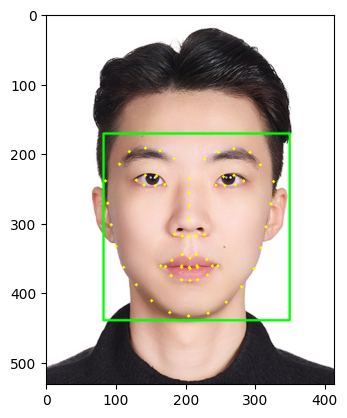

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코 끝의 index는 30 입니다
    x = landmark[30][0] # 코 끝의 x 좌표
    y = landmark[30][1] # 코 끝의 y 좌표
    w = int((landmark[35][0] - landmark[31][0]) * 1.5) * 3 # 콧볼 너비를 기준으로 스티커 너비 설정
    h = int((landmark[33][1] - landmark[30][1]) * 2) * 2
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(204, 294)
(x,y) : (204,294)
(w,h) : (192,100)


(100, 192, 3)


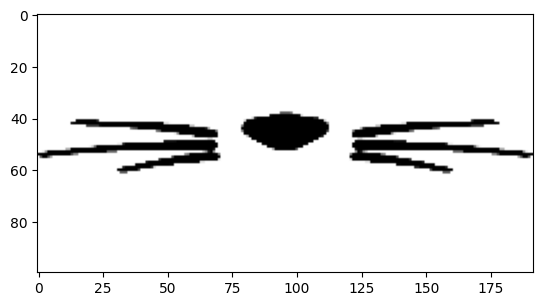

In [12]:
cat_path = '/content/drive/MyDrive/Aiffel/cat-whiskers.png'
img_cat = cv2.imread(cat_path)
img_cat = cv2.resize(img_cat, (w, h)) # 이미지 사이즈 조정 w, h는 얼굴 영역의 가로를 차지하는 픽셀의 수를 보여줍니다.

print(img_cat.shape) # 사이즈를 조정한 고양이 수염 이미지의 차원 확인합니다.
plt.imshow(img_cat)
plt.show()

In [13]:
# x는 이미지에서 코 부위의 x값 = 204
# y는 이미지에서 코 부위의 y값 = 294
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 192
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 100

refined_x = x - (w // 2) # 204 - (192 // 2)
refined_y = y - (h // 2) # 294 - (100 // 2)

print(f'(x, y) : ({refined_x}, {refined_y})')

# 이미지 시작점은 top-left 좌표입니다.
# 즉 refined_x, refined_y 좌표에서 고양이 수염 이미지 시작합니다.
# 음수가 발생한 이유는 이미지의 범위를 벗어나서입니다.

(x, y) : (108, 244)


In [14]:
# 좌표 순서는 y, x이기에 주의할 것!!
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 고양이 수염 이미지(혹은 추후 적용할 스티커 이미지)를 자릅니다.

if refined_x < 0:
    img_cat = img_cat[:, -refined_x:]
    refined_x = 0
# 고양이 수염 이미지를 씌우기 위해 고양이 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_cat = img_cat[-refined_y:, :] # refined_y가 -83이므로, img_cat[83: , :]가 된다. (268, 268, 3)에서 (185, 268, 3)이 됨 (268개 중에서 83개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (108,244)


In [15]:
sticker_area = img_show[refined_y : refined_y + img_cat.shape[0], refined_x : refined_x + img_cat.shape[1]]

In [16]:
img_show[refined_y : refined_y + img_cat.shape[0], refined_x : refined_x + img_cat.shape[1]] = \
    np.where(img_cat != 0, sticker_area, img_cat).astype(np.uint8) # != 하는 이유는 흑백 부분때문에

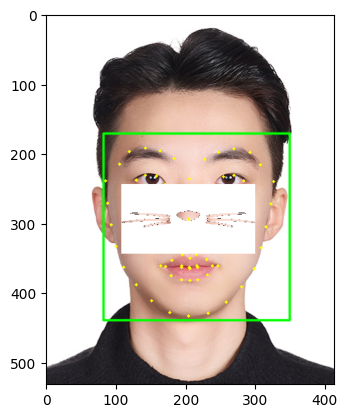

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

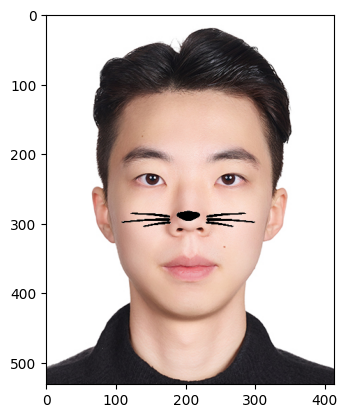

In [20]:
sticker_area = img_bgr[refined_y:refined_y +img_cat.shape[0], refined_x:refined_x+img_cat.shape[1]]

img_bgr[refined_y:refined_y +img_cat.shape[0], refined_x:refined_x+img_cat.shape[1]] = \
    np.where(img_cat != 255,sticker_area,img_cat).astype(np.uint8) # != 하는 이유는 흑백 부분때문에
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

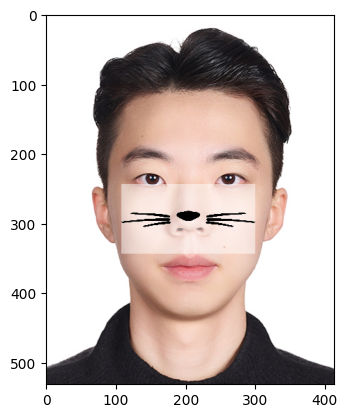

In [22]:
alpha = 0.5 # 1불투명 0투명
# 고양이 수염이 원본 이미지 덮어쓰기
if (refined_y + img_cat.shape[0] <= img_bgr.shape[0]) and (refined_x + img_cat.shape[1] <= img_bgr.shape[1]):
  # 스티커 영역 추출
  sticker_area = img_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]

  # 스티커와 원본 이미지 합성
  blended = cv2.addWeighted(sticker_area, 1 - alpha, img_cat, alpha, 0)

  # 합성된 이미지를 원본 이미지에 적용
  img_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]] = blended

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회고
1. Flaticon에서 다운받은 이미지의 흰색 부분을 없애는 부분이 난간이었다. <br>
2. 셀카를 사용하는 게 가장 힘들었다...<br>
3. 다양한 얼굴 각도에 대한 실험을 해보지 못해 아쉬웠다. <br>

## 문제점 찾아보기
1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요? <br>
- 얼굴 각도에 따라 스티커도 변형시켜줘야하니 회전을 줘야합니다.
2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?<br>
- 멀리서 찍게 되면 x, y, w, h의 좌표값이 너무 오밀조밀하게 붙어 바운딩박스를 치기에 애매해질 것 같습니다. 또한 옆으로 누워서도 마찬가지라 생각이 됩니다.
3. 실행 속도가 중요할까요?
- 매우 중요하다고 생각합니다. 카메라 어플에서 바로바로 인식이 되어야 사용자들이 다양한 스티커를 사용해보고 마음에 드는 것을 고를 수 있기 때문입니다.
4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요? <br>
- 매우 중요하다고 생각합니다. 예를 들어 얼굴이 아닌 무릎을 얼굴이라 인식해서 무릎에 스티커 사진이 생겨나면 안 됩니다.